In [1]:
from transformers import CamembertModel, CamembertTokenizer
from transformers import AutoTokenizer, AutoModel, AutoModelForMaskedLM
from transformers import pipeline

import torch
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
tokenizer = CamembertTokenizer.from_pretrained("camembert/camembert-base-wikipedia-4gb")
camembert = CamembertModel.from_pretrained("camembert/camembert-base-wikipedia-4gb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sentencepiece.bpe.model:   0%|          | 0.00/793k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/455 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertModel were not initialized from the model checkpoint at camembert/camembert-base-wikipedia-4gb and are newly initialized: ['roberta.embeddings.word_embeddings.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
camembert_fill_mask  = pipeline("fill-mask", model="camembert/camembert-base-wikipedia-4gb", tokenizer="camembert/camembert-base-wikipedia-4gb", device=0)
results = camembert_fill_mask("Le camembert est un fromage de <mask>!")

Device set to use cuda:0


In [4]:
results

[{'score': 0.4937804043292999,
  'token': 19370,
  'token_str': 'chèvre',
  'sequence': 'Le camembert est un fromage de chèvre !'},
 {'score': 0.06255898624658585,
  'token': 30616,
  'token_str': 'brebis',
  'sequence': 'Le camembert est un fromage de brebis !'},
 {'score': 0.043401919305324554,
  'token': 2364,
  'token_str': 'montagne',
  'sequence': 'Le camembert est un fromage de montagne !'},
 {'score': 0.028232445940375328,
  'token': 3236,
  'token_str': 'Noël',
  'sequence': 'Le camembert est un fromage de Noël !'},
 {'score': 0.021357377991080284,
  'token': 12329,
  'token_str': 'vache',
  'sequence': 'Le camembert est un fromage de vache !'}]

# À vous ! modifiez la phrase pour que la sortie la plus probable soit - "Vache"

In [5]:
results = camembert_fill_mask("Le <mask> est fait avec du lait frais d'une vache!")

In [6]:
# Tokenize in sub-words with SentencePiece
tokenized_sentence = tokenizer.tokenize("J'aime le camembert !")

In [7]:
tokenized_sentence

['▁J', "'", 'aime', '▁le', '▁cam', 'ember', 't', '▁!']

In [8]:
encoded_sentence = tokenizer.encode(tokenized_sentence)

In [9]:
encoded_sentence = torch.tensor(encoded_sentence).unsqueeze(0)

In [10]:
encoded_sentence

tensor([[    5,   221,    10, 10600,    14,  8952, 10540,    75,  1114,     6]])

In [11]:
embeddings, _ = camembert(encoded_sentence)
# embeddings.detach()
# embeddings.size torch.Size([1, 10, 768])
#tensor([[[-0.0928,  0.0506, -0.0094,  ..., -0.2388,  0.1177, -0.1302],
#         [ 0.0662,  0.1030, -0.2355,  ..., -0.4224, -0.0574, -0.2802],
#         [-0.0729,  0.0547,  0.0192,  ..., -0.1743,  0.0998, -0.2677],
#         ...,

In [12]:
embeddings

'last_hidden_state'

In [13]:
camembert(encoded_sentence)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0243,  0.0902, -0.0286,  ..., -0.1175, -0.0263, -0.1568],
         [-0.0832, -0.0522, -0.0954,  ...,  0.1397, -0.2505, -0.1039],
         [-0.0959, -0.0334, -0.0113,  ...,  0.0228, -0.3576, -0.1228],
         ...,
         [-0.1210, -0.1009,  0.0071,  ..., -0.0121, -0.0996, -0.1015],
         [-0.1345, -0.1174, -0.0113,  ...,  0.0550, -0.0301, -0.0718],
         [-0.1950, -0.1053, -0.0158,  ...,  0.0316, -0.0035,  0.0292]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-8.0063e-02,  1.6328e-01, -3.3862e-02,  2.3250e-01,  6.1304e-02,
          4.4690e-02,  1.5114e-02, -1.5875e-01,  2.8054e-02, -9.8070e-02,
          1.2959e-01, -2.9720e-02,  7.7951e-02,  3.0606e-02, -8.1401e-02,
         -1.3140e-01,  1.4068e-02, -2.9233e-02,  2.4750e-03, -5.7888e-02,
         -1.4102e-01,  1.2531e-01,  4.9240e-02, -8.3836e-02,  6.5588e-02,
         -2.0414e-01, -4.5898e-02,  2.5446e-02,  2.6398e-01, -2.446

In [14]:
camembertav2 = AutoModel.from_pretrained("almanach/camembertav2-base")
tokenizer = AutoTokenizer.from_pretrained("almanach/camembertav2-base")

config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/756k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

In [15]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#camembertav2 = camembertav2.to(device)

In [16]:
def encode_sequence(sequence, tokenizer, model):
    inputs = tokenizer(sequence, return_tensors="pt", padding=True, truncation=True)
    #inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to GPU
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)

In [17]:
sequence_1 = "J'ai un stylo et une belle voiture"
sequence_2 = "ma voiture n'a pas voulu démarrer ce matin"
sequence_3 = "J'ai une pomme"

In [18]:
vec_1 = encode_sequence(sequence_1, tokenizer, camembertav2)
vec_2 = encode_sequence(sequence_2, tokenizer, camembertav2)
vec_3 = encode_sequence(sequence_3, tokenizer, camembertav2)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [19]:
similarity_1_2 = cosine_similarity(vec_1.detach().numpy(), vec_2.detach().numpy())[0][0]
similarity_1_3 = cosine_similarity(vec_1.detach().numpy(), vec_3.detach().numpy())[0][0]
similarity_2_3 = cosine_similarity(vec_2.detach().numpy(), vec_3.detach().numpy())[0][0]

In [20]:
similarity_1_2, similarity_1_3, similarity_2_3

(0.9604817, 0.9627716, 0.950169)

In [21]:
!gdown 1A6P3_YVUo-DYDbpAn_RDA4pRFydI-4ju
!gdown 1ZtOZ7UewZaR-XUSH01W2CDfrc6v8EU-s

Downloading...
From: https://drive.google.com/uc?id=1A6P3_YVUo-DYDbpAn_RDA4pRFydI-4ju
To: /content/1870_Verne-Jules_Vingt-mille-lieues-sous-les-mers.txt
100% 912k/912k [00:00<00:00, 10.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZtOZ7UewZaR-XUSH01W2CDfrc6v8EU-s
To: /content/1869_Flaubert-Gustave_L-Education-sentimentale.txt
100% 1.00M/1.00M [00:00<00:00, 10.8MB/s]


In [22]:
texte_flaubert = open('1869_Flaubert-Gustave_L-Education-sentimentale.txt', encoding='utf8').read()
text_verne = open('1870_Verne-Jules_Vingt-mille-lieues-sous-les-mers.txt', encoding='utf8').read()

In [23]:
import nltk
from nltk.tokenize import sent_tokenize

In [24]:
nltk.download('punkt_tab')
nltk.download('punkt')
sentences_flaubert = sent_tokenize(texte_flaubert)
sentences_verne = sent_tokenize(text_verne)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
sentences_flaubert = [element for element in sentences_flaubert if len(element)>30]

In [26]:
from tqdm.notebook import tqdm

In [27]:
sentences_verne = [element for element in tqdm(sentences_verne) if len(element)>30]

  0%|          | 0/6002 [00:00<?, ?it/s]

In [43]:
def encode_sentences_in_batches(sentences, tokenizer, model, batch_size=32):
    all_embeddings = []

    for i in tqdm(range(0, len(sentences), batch_size)):
        batch_sentences = sentences[i:i + batch_size]

        inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors='pt', max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        #embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings = outputs.last_hidden_state[:, 0, :]
        all_embeddings.append(embeddings)

    all_embeddings = torch.cat(all_embeddings, dim=0)
    return all_embeddings

In [45]:
batch_size = 8
encoded_flaubert = encode_sentences_in_batches(sentences_flaubert[:1000], tokenizer, camembertav2, batch_size)
encoded_verne = encode_sentences_in_batches(sentences_verne[:1000], tokenizer, camembertav2, batch_size)

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_similarity(encoded_set1, encoded_set2):
    similarities = cosine_similarity(encoded_set1, encoded_set2)
    return similarities


similarities = calculate_similarity(encoded_flaubert, encoded_verne)

most_similar_pairs = np.unravel_index(np.argsort(similarities, axis=None)[::-1], similarities.shape)


In [47]:
for i in range(10):
    flaubert_idx, verne_idx = most_similar_pairs[0][i], most_similar_pairs[1][i]
    print(f"Flaubert phrase: {sentences_flaubert[flaubert_idx]}")
    print(f"Verne phrase: {sentences_verne[verne_idx]}")
    print(f"Similarity: {similarities[flaubert_idx][verne_idx]}\n")

Flaubert phrase: Comme il n’avait aucun travail, son désœuvrement renforçait sa tristesse.Il passait des heures à regarder, du haut de son balcon, la rivière qui coulait entre les quais grisâtres, noircis, de place en place, par la bavure des égouts, avec un ponton de blanchisseuses amarré contre le bord, où des gamins quelquefois s’amusaient, dans la vase, à faire baigner un caniche.
Verne phrase: Quelques instants après, les deux cheminées de la frégate vomissaient des torrents de fumée noire, et le pont frémissait sous le tremblotement des chaudières.L’Abraham-Lincoln, chassé en avant par sa puissante hélice, se dirigea droit sur l’animal.
Similarity: 0.9848256707191467

Flaubert phrase: Sa voix de contralto prenait dans les cordes basses une intonation lugubre qui glaçait, et alors sa belle tête, aux grands sourcils, s’inclinait sur son épaule ; sa poitrine se gonflait, ses bras s’écartaient, son cou d’où s’échappaient des roulades se renversait mollement comme sous des baisers aér

In [31]:
for i in range(10):
    flaubert_idx, verne_idx = most_similar_pairs[0][i], most_similar_pairs[1][i]
    print(f"Flaubert phrase: {sentences_flaubert[flaubert_idx]}")
    print(f"Verne phrase: {sentences_verne[verne_idx]}")
    print(f"Similarity: {similarities[flaubert_idx][verne_idx]}\n")


Flaubert phrase: Une angoisse permanente l’étouffait.
Verne phrase: Ma respiration se faisait difficilement.
Similarity: 0.9983499050140381

Flaubert phrase: Une angoisse permanente l’étouffait.
Verne phrase: Un silence profond régnait sur le pont.
Similarity: 0.9980431795120239

Flaubert phrase: Frédéric, n’ayant point la somme suffisante, emprunta cent écus à Deslauriers ; quinze jours plus tard, il réitéra la même demande, et le clerc le gronda pour les dépenses auxquelles il se livrait chez Arnoux.Effectivement, il n’y mettait point de modération.
Verne phrase: Cependant une circonstance se présenta, qui mit en relief la merveilleuse habileté de Ned Land, et montra quelle confiance on devait avoir en lui.Au large des Malouines, le 30 juin, la frégate communiqua avec des baleiniers américains, et nous apprîmes qu’ils n’avaient eu aucune connaissance du narwal.
Similarity: 0.998019278049469

Flaubert phrase: Or, n’ayant pas de temps à perdre, il n’irait point à la maison cette année 

In [32]:
def plot_embeddings_pca(embeddings, title):
    # Reduce dimensions using PCA
    pca = PCA(n_components=2, random_state=42)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Plot the reduced embeddings
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='red', alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel('PCA Dimension 1', fontsize=12)
    plt.ylabel('PCA Dimension 2', fontsize=12)
    plt.show()

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

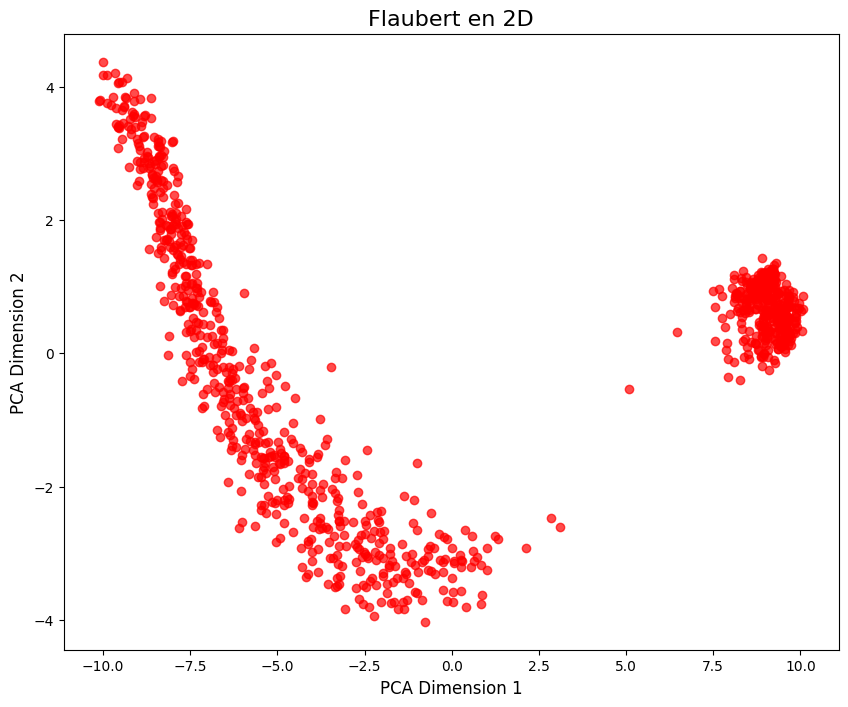

In [34]:
plot_embeddings_pca(encoded_flaubert, "Flaubert en 2D")

# Essayez avec ces phrases !

In [48]:
maupassant = ["Quand la caissière lui eut rendu la monnaie de sa pièce de cent sous, Georges Duroy sortit du restaurant. Comme il portait beau par nature et par pose d’ancien sous-officier, il cambra sa taille, frisa sa moustache d’un geste militaire et familier, et jeta sur les dîneurs attardés un regard rapide et circulaire, un de ces regards de joli garçon, qui s’étendent comme des coups d’épervier.Les femmes avaient levé la tête vers lui, trois petites ouvrières, une maîtresse de musique entre deux âges, mal peignée, négligée, coiffée d’un chapeau toujours poussiéreux et vêtue toujours d’une robe de travers, et deux bourgeoises avec leurs maris, habituées de cette gargote à prix fixe.Lorsqu’il fut sur le trottoir, il demeura un instant immobile, se demandant ce qu’il allait faire. On était au 28 juin, et il lui restait juste en poche trois francs quarante pour finir le mois. Cela représentait deux dîners sans déjeuners, ou deux déjeuners sans dîners, au choix. Il réfléchit que les repas du matin étant de vingt-deux sous, au lieu de trente que coûtaient ceux du soir, il lui resterait, en se contentant des déjeuners, un franc vingt centimes de boni, ce qui représentait encore deux collations au pain et au saucisson, plus deux bocks sur le boulevard. C’était là sa grande dépense et son grand plaisir des nuits ; et il se mit à descendre la rue Notre-Dame-de-Lorette"]
flaubert = ["Le 15 septembre 1840, vers six heures du matin, la Ville-de-Montereau, près de partir, fumait à gros tourbillons devant le quai Saint-Bernard.Des gens arrivaient hors d’haleine ; des barriques, des câbles, des corbeilles de linge gênaient la circulation ; les matelots ne répondaient à personne ; on se heurtait ; les colis montaient entre les deux tambours, et le tapage s’absorbait dans le bruissement de la vapeur, qui, s’échappant par des plaques de tôle, enveloppait tout d’une nuée blanchâtre, tandis que la cloche, à l’avant, tintait sans discontinuer.Enfin le navire partit ; et les deux berges, peuplées de magasins, de chantiers et d’usines, filèrent comme deux larges rubans que l’on déroule.Un jeune homme de dix-huit ans, à longs cheveux et qui tenait un album sous son bras, restait auprès du gouvernail, immobile. À travers le brouillard, il contemplait des clochers, des édifices dont il ne savait pas les noms ; puis il embrassa, dans un dernier coup d’œil, l’île Saint-Louis, la Cité, Notre-Dame ; et bientôt, Paris disparaissant, il poussa un grand soupir.M. Frédéric Moreau, nouvellement reçu bachelier, s’en retournait à Nogent-sur-Seine, où il devait languir pendant deux mois, avant d’aller faire son droit. Sa mère, avec la somme indispensable, l’avait envoyé au Havre voir un oncle, dont elle espérait, pour lui, l’héritage ; il en était revenu la veille seulement ; et il se dédommageait de ne pouvoir séjourner dans la capitale, en regagnant sa province par la route la plus longue."]
anonyme = ["Il en oubliait la Maréchale, ne s’inquiétait même pas de Mme Arnoux, – ne songeant qu’à lui, à lui seul, – perdu dans les décombres de ses rêves, malade, plein de douleur et de découragement ; et, en haine du milieu factice où il avait tant souffert, il souhaita la fraîcheur de l’herbe, le repos de la province, une vie somnolente passée à l’ombre du toit natal, avec des cœurs ingénus. Le mercredi soir enfin, il sortit.Des groupes nombreux stationnaient sur le boulevard. De temps à autre, une patrouille les dissipait ; ils se reformaient derrière elle. On parlait librement, on vociférait contre la troupe des plaisanteries et des injures, sans rien de plus.– Comment ! est-ce qu’on ne va pas se battre ? dit Frédéric à un ouvrier.L’homme en blouse lui répondit :– Pas si bêtes de nous faire tuer pour les bourgeois ! Qu’ils s’arrangent !Et un monsieur grommela, tout en regardant de travers le faubourien :– Canailles de socialistes ! Si on pouvait, cette fois, les exterminer !Frédéric ne comprenait rien à tant de rancune et de sottise. Son dégoût de Paris en augmenta ; et, le surlendemain, il partit pour Nogent par le premier convoi.Les maisons bientôt disparurent, la campagne s’élargit. Seul dans son wagon et les pieds sur la banquette, il ruminait les événements des derniers jours, tout son passé. Le souvenir de Louise lui revint.« Elle m’aimait, celle-là ! J’ai eu tort de ne pas saisir ce bonheur. Bah ! n’y pensons plus !... »Puis, cinq minutes après :« Qui sait, cependant ?"]

In [49]:
proust0 = ["Et, seulement descendues dans leur jardin (peu éloigné de celui de la duchesse) pour faire la cueillette des fruits nécessaires aux compotes, venaient-elles, avant de rentrer chez elles, dire bonsoir à Mme de Guermantes chez laquelle elles n’allaient pourtant pas jusqu’à apporter un sécateur ou un arrosoir. Le duc parut touché que je fusse venu chez eux le jour même de son retour. Mais sa figure se rembrunit quand je lui eus dit que je venais demander à sa femme de s’informer si sa cousine m’avait réellement invité. Je venais d’effleurer une de ces sortes de services que M. et Mme de Guermantes n’aimaient pas rendre. Le duc me dit qu’il était trop tard, que si la princesse ne m’avait pas envoyé d’invitation, il aurait l’air d’en demander une, que déjà ses cousins lui en avaient refusé une, une fois, et qu’il ne voulait plus, ni de près, ni de loin, avoir l’air de se mêler de leurs listes, « de s’immiscer », enfin qu’il ne savait même pas si lui et sa femme, qui dînaient en ville, ne rentreraient pas aussitôt après chez eux, que dans ce cas leur meilleure excuse de n’être pas allés à la soirée de la princesse était de lui cacher leur retour à Paris, que, certainement sans cela, ils se seraient au contraire empressés de lui faire connaître en lui envoyant un mot ou un coup de téléphone à mon sujet, et certainement trop tard, car en toute hypothèse les listes de la princesse étaient certainement closes. « Vous n’êtes pas mal avec elle », me dit-il d’un air soupçonneux, les Guermantes craignant toujours de ne pas être au courant des dernières brouilles et qu’on ne cherchât à se raccommoder sur leur dos. Enfin comme le duc avait l’habitude de prendre sur lui toutes les décisions qui pouvaient sembler peu aimables : « Tenez, mon petit, me dit-il tout à coup, comme si l’idée lui en venait brusquement à l’esprit, j’ai même envie de ne pas dire du tout à Oriane que vous m’avez parlé de cela. Vous savez comme elle est aimable, de plus elle vous aime énormément, elle voudrait envoyer chez sa cousine malgré tout ce que je pourrais lui dire, et si elle est fatiguée après dîner, il n’y aura plus d’excuse, elle sera forcée d’aller à la soirée. Non, décidément, je ne lui en dirai rien. Du reste vous allez la voir tout à l’heure. Pas un mot de cela, je vous prie. Si vous vous décidez à aller à la soirée je n’ai pas besoin de vous dire quelle joie nous aurons de passer la soirée avec vous. »"]
proust1 = ["Mais ce cas était le plus rare ; d’ailleurs, quand le jour de la présentation arrivait enfin (à un moment où elle était d’ordinaire déjà assez indifférente au duc, dont les actions, comme celles de tout le monde, étaient plus souvent commandées par les actions antérieures, dont le mobile premier n’existait plus) il se trouvait souvent que ç’avait été Mme de Guermantes qui avait cherché à recevoir la maîtresse en qui elle espérait et avait si grand besoin de rencontrer, contre son terrible époux, une précieuse alliée. Ce n’est pas que, sauf à de rares moments, chez lui, où, quand la duchesse parlait trop, il laissait échapper des paroles et surtout des silences qui foudroyaient, M. de Guermantes manquât vis-à-vis de sa femme de ce qu’on appelle les formes. Les gens qui ne les connaissaient pas pouvaient s’y tromper. Quelquefois, à l’automne, entre les courses de Deauville, les eaux et le départ pour Guermantes et les chasses, dans les quelques semaines qu’on passe à Paris, comme la duchesse aimait le café-concert, le duc allait avec elle y passer une soirée. Le public remarquait tout de suite, dans une de ces petites baignoires découvertes où l’on ne tient que deux, cet Hercule en « smoking » (puisqu’en France on donne à toute chose plus ou moins britannique le nom qu’elle ne porte pas en Angleterre), le monocle à l’œil, dans sa grosse mais belle main, à l’annulaire de laquelle brillait un saphir, un gros cigare dont il tirait de temps à autre une bouffée, les regards habituellement tournés vers la scène, mais, quand il les laissait tomber sur le parterre où il ne connaissait d’ailleurs absolument personne, les émoussant d’un air de douceur, de réserve, de politesse, de considération. Quand un couplet lui semblait drôle et pas trop indécent, le duc se retournait en souriant vers sa femme, partageait avec elle, d’un signe d’intelligence et de bonté, l’innocente gaieté que lui procurait la chanson nouvelle. Et les spectateurs pouvaient croire qu’il n’était pas de meilleur mari que lui ni de personne plus enviable que la duchesse — cette femme en dehors de laquelle étaient pour le duc tous les intérêts de la vie, cette femme qu’il n’aimait pas, qu’il n’avait jamais cessé de tromper ; — quand la duchesse se sentait fatiguée, ils voyaient M. de Guermantes se lever, lui passer lui-même son manteau en arrangeant ses colliers pour qu’ils ne se prissent pas dans la doublure, et lui frayer un chemin jusqu’à la sortie avec des soins empressés et respectueux qu’elle recevait avec la froideur de la mondaine qui ne voit là que du simple savoir-vivre, et parfois même avec l’amertume un peu ironique de l’épouse désabusée qui n’a plus aucune illusion à perdre."]

In [50]:
chateau = ["Lorsqu’en 1806 j’entrepris le voyage d’outre-mer, Jérusalem était presque oubliée ; un siècle anti-religieux avait perdu mémoire du berceau de la religion : comme il n’y avait plus de chevaliers, il semblait qu’il n’y eût plus de Palestine.  Le dernier voyageur dans le Levant, M. le comte de Volney, avait donné au public d’excellents renseignements sur la Syrie ; mais il s’était borné à des détails généraux sur le gouvernement de la Judée."]

In [51]:
mohican_dialogue = [" — Comment ! il est parti pour Rome ? s’écria M. Gérard ; l’abbé Dominique est parti pour Rome ?  — Eh ! mon Dieu, oui !  — Et qu’est-il allé faire à Rome ?  — Mon cher monsieur Gérard, il n’y a qu’un homme qui puisse relever l’abbé Dominique du secret de la confession.  — Oui, le pape.  — Eh bien, il est allé demander au pape de le relever de ce secret.  — Oh ! mon Dieu !  — C’est pour avoir le temps de faire le voyage qu’il a sollicité et obtenu du roi un sursis.  — Mais je suis perdu, alors ! s’écria M. Gérard.  — Pourquoi cela ?  — Le pape lui accordera sa demande.  M. Jackal secoua la tête.  — Non, vous croyez que non ?  — J’en suis sûr, monsieur Gérard.  — Comment en êtes-vous sûr ?  — Je connais Sa Sainteté.  — Vous avez l’honneur de connaître le pape ?  — Comme la police a l’honneur de tout connaître, monsieur Gérard ; "]
mohican_récit = ["C’était le lendemain ou le surlendemain de la visite de M. Jackal à M. Gérard – car on comprendra qu’il nous est impossible, à un jour près, de renseigner positivement nos lecteurs : nous suivons l’ordre chronologique des événements, voilà tout. – Il était dix heures et demie du matin. Pétrus, Ludovic et Jean Robert étaient assis : Pétrus dans une bergère, Ludovic sur un fauteuil Rubens, Jean Robert dans un immense voltaire. Chacun d’eux avait à la portée de sa main une tasse de thé plus ou moins vide, et, dans le milieu de l’atelier, une table encore servie indiquait que le thé était employé, comme digestif, à la suite d’un déjeuner substantiel.  Un manuscrit écrit en lignes inégales – en vers par conséquent –, dont les cinq actes séparés gisaient confusément à terre, à la droite de Jean Robert, prouvait que le poète venait de faire une lecture"]

In [52]:
Nothomb = ["Soudain, il se souvint d’un conte d’Oscar Wilde qui racontait une histoire similaire. La bibliothèque du Pluvier était si désordonnée qu’y retrouver un livre relevait du miracle.  Neville préféra se rendre à la librairie du village. Sur le catalogue Folio, il repéra le titre d’Oscar Wilde : Le Crime de lord Arthur Savile. Le libraire en possédait un exemplaire. De retour chez lui, Henri s’isola avec le livre qu’il dévora. Dans sa jeunesse, il l’avait lu avec hilarité : il comprenait à présent la gravité de cette affaire.  Sur le point d’épouser la belle Sybil dont il était éperdument amoureux, lord Arthur Savile lors d’une soirée à Londres se fit lire les lignes de la main par un chiromancien renommé qui lui annonça qu’il allait commettre un crime. En proie au désespoir, lord Arthur erra toute la nuit avant d’ajourner son mariage. Il lui fallait se débarrasser de la sale besogne avant d’unir son destin avec celle qu’il aimait. On ne racontera pas ici les péripéties de ce noble anglais, pris entre les exigences contraires du devoir, de l’étiquette et de l’amour afin de préserver le plaisir de lecture des intéressés que l’on espère nombreux."]
SA = [" Nous signons. Pinaud qui fait office de maire continue de fourbir sa braguette éclaboussée d’encre en marmonnant des consternations. Il ronchonne comme quoi faut être gestapiste dans l’âme pour placer un encrier boiteux sur la table des mariages à une époque où la pointe Bic submerge la France.  Avouez qu’il a raison, Pinuchet. Le régisseur de la maison Poupoule qui nous a organisé cette mairie-bidon à Chaulx-lez-Maron (Yvelines) a trop forcé sur le folklore. Il les a vues seulement dans les films de Berthomieu, les petites mairies de nos chères campagnes. Y aurait pas la binette à Carolus en gévacolor sur le mur, on se croirait dans un vaudeville datant du muet. Heureusement que notre Colon-les-deux-étoiles est là pour affirmer son époque (A l’heure où nous mettons sous presse, les photos du président de Pompidou ne sont pas encore sèches à l’instar des chemises de l’archiduchesse).  — Au lieu de rouscailler, m’sieur le maire de ma paire ferait p’t’être mieux de gazouiller un laïus aux jeunes z’époux ! déclare le Dodu."]

In [66]:
inputs = tokenizer(proust, padding=True, truncation=True, return_tensors='pt', max_length=512)
with torch.no_grad():
  outputs = camembertav2(**inputs)

#embedding_flaubert = outputs.last_hidden_state.mean(dim=1)
embedding_proust = outputs.last_hidden_state[:, 0, :]

In [69]:
import torch.nn.functional as F
F.cosine_similarity(F.normalize(embedding_proust1, p=2, dim=1), F.normalize(embedding_proust, p=2, dim=1))

tensor([0.9776])

In [70]:
F.cosine_similarity(embedding_proust1, embedding_proust)

tensor([0.9776])

In [65]:
F.cosine_similarity(embedding_anonyme, embedding_flaubert)

tensor([0.9668])

In [74]:
F.cosine_similarity(embedding_anonyme, embedding_SA)

tensor([0.9672])

In [71]:
from sentence_transformers import SentenceTransformer

In [72]:
model = SentenceTransformer("crazyjeannot/fr_literary_bge_base")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.27k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [79]:
SA_embeddings = model.encode(SA)

In [90]:
FL2_embeddings = model.encode(flaubert)

In [94]:
F.cosine_similarity(F.normalize(torch.tensor(SA_embeddings), p=2, dim=1), F.normalize(torch.tensor(FL_embeddings), p=2, dim=1))

tensor([-0.0329])

In [85]:
SA_embeddings[0]

-0.05647812

In [92]:
from sentence_transformers import SentenceTransformer
import torch.nn.functional as F

model = SentenceTransformer("crazyjeannot/fr_literary_bge_base") # Ou un autre !
SA_embeddings = model.encode(SA)
FL_embeddings = model.encode(flaubert)
F.cosine_similarity(torch.tensor(SA_embeddings), torch.tensor(FL_embeddings))

tensor([-0.0329])